In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [4]:
train = pd.read_csv('data/ODIR-5K_Training_Annotations(Updated)_V2.csv')

In [5]:
train.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [76]:
corr = train.apply(lambda x: x['Left-Diagnostic Keywords'] == x['Right-Diagnostic Keywords'], axis=1)

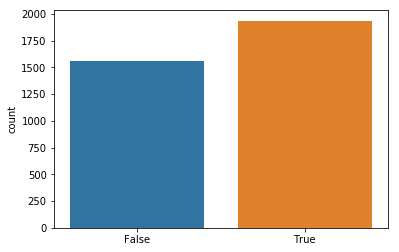

In [77]:
sns.countplot(corr)

In [78]:
summ = train.apply(lambda x: x['N'] + x['D'] + x['G'] + x['C'] + x['A'] + x['H'] + x['M'] + x['O'], axis=1)
summ.value_counts()

1    2914
2     557
3      29
dtype: int64

In [88]:
ind = []
for i in range(len(summ)):
    if summ[i] == 3:
        ind.append(i)

In [89]:
train.iloc[ind]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
188,188,55,Female,188_left.jpg,188_right.jpg,laser spot，severe proliferative diabetic retin...,cataract,0,1,0,1,0,0,0,1
304,305,55,Male,305_left.jpg,305_right.jpg,"hypertensive retinopathy,diabetic retinopathy",hypertensive retinopathy，macular epiretinal me...,0,1,0,0,0,1,0,1
624,625,72,Female,625_left.jpg,625_right.jpg,cataract，suspected glaucoma,cataract，branch retinal vein occlusion,0,0,1,1,0,0,0,1
935,938,76,Male,938_left.jpg,938_right.jpg,dry age-related macular degeneration，myopia re...,diabetic retinopathy，dry age-related macular d...,0,1,0,0,1,0,1,0
1007,1020,67,Male,1020_left.jpg,1020_right.jpg,glaucoma，intraretinal hemorrhage,myopia retinopathy,0,0,1,0,0,0,1,1
1186,1263,62,Male,1263_left.jpg,1263_right.jpg,old central retinal vein occlusion,glaucoma，hypertensive retinopathy,0,0,1,0,0,1,0,1
1219,1303,49,Male,1303_left.jpg,1303_right.jpg,glaucoma，central retinal vein occlusion,hypertensive retinopathy,0,0,1,0,0,1,0,1
1265,1410,69,Female,1410_left.jpg,1410_right.jpg,suspected glaucoma，refractive media opacity,mild nonproliferative retinopathy,0,1,1,0,0,0,0,1
1293,1442,63,Male,1442_left.jpg,1442_right.jpg,glaucoma，mild nonproliferative retinopathy，mac...,pigmentation disorder,0,1,1,0,0,0,0,1
1313,1474,79,Female,1474_left.jpg,1474_right.jpg,glaucoma，moderate non proliferative retinopathy,drusen,0,1,1,0,0,0,0,1


In [157]:
left_unique_full = train['Left-Diagnostic Keywords'].unique()
right_unique_full = train['Right-Diagnostic Keywords'].unique()

In [158]:
left_unique = []
right_unique = []
for label in left_unique_full:
    left_unique.extend(label.split('，'))
for label in right_unique_full:
    right_unique.extend(label.split('，'))

In [159]:
left_unique = list(set(left_unique))
right_unique = list(set(right_unique))
unique = []
for label in left_unique:
    unique.extend(label.split(','))
for label in right_unique:
    unique.extend(label.split(','))
unique_diagnosis = list(set(unique))
len(unique_diagnosis)

102

In [160]:
for diagnosis in unique_diagnosis:
    if 'retinopathy' in diagnosis:
        print(diagnosis)

old chorioretinopathy
suspicious diabetic retinopathy
hypertensive retinopathy
suspected moderate non proliferative retinopathy
central serous chorioretinopathy
mild nonproliferative retinopathy
diabetic retinopathy
severe proliferative diabetic retinopathy
myopia retinopathy
suspected diabetic retinopathy
proliferative diabetic retinopathy
myopic retinopathy
moderate non proliferative retinopathy
severe nonproliferative retinopathy


In [161]:
for diagnosis in unique_diagnosis:
    if 'macular degeneration' in diagnosis:
        print(diagnosis)

wet age-related macular degeneration
dry age-related macular degeneration
age-related macular degeneration


In [162]:
for diagnosis in unique_diagnosis:
    if 'fundus' in diagnosis:
        print(diagnosis)

normal fundus
no fundus image
tessellated fundus
fundus laser photocoagulation spots
